In [1]:
import sys
sys.path.append('../..')

from scripts.data_loaders.common import show_sample
from scripts.data_loaders.CORAAL import CORAALDataset
from scripts.core.audio import TARGET_SAMPLE_RATE
from scripts.ipa_transcription.wav2vec2 import transcribe_batch

import torch
from transformers import AutoProcessor, AutoModelForCTC

from IPython.display import clear_output
clear_output()

In [2]:
data = CORAALDataset(include_speaker_info=True)

In [3]:
aks_examples = list(data.search_transcript(" aks "))
print(f"Found {len(aks_examples)} examples of 'aks' in the transcripts")
aks_example1 = aks_examples[0]
print(aks_example1[-1])

Found 6 examples of 'aks' in the transcripts
I just gotta>>> aks <<<the questions to exp


IPA: I just gotta aks the questions to explore your spectrum.
Metadata: {'CORAAL.Sub': 'ATL', 'Version.Created': 'v.2020.05', 'Version.Modified': nan, 'CORAAL.Spkr': 'ATL_se0_ag1_m_02', 'CORAAL.File': 'ATL_se0_ag1_m_02_1', 'Audio.Folder': 'ATL_wav_part02', 'Tarball': 'ATL_audio_part02_2020.05.tar.gz', 'Primary.Spkr': 'yes', 'SLAAP.Collection': 'atl', 'SLAAP.Spkr': 'atl007', 'SLAAP.Interview': 'atl0070d', 'Gender': 'Male', 'Age': 23, 'Age.Group': '-29', 'Year.of.Birth': 1994, 'Year.of.Interview': 2017, 'CORAAL.SEC.Group': 0, 'Education': 'High School', 'Edu.Group': 'HIgh School', 'Occupation': 'Security Guard', 'Other.Places.Lived': 'Milwaukee, WI', 'Guardian.1.Birthplace': 'Midwest', 'Guardian.1.Birthplace.State': 'Midwest', 'Guardian.1.Education': 'Unknown', 'Guardian.1.Occupation': 'Nurse', 'Guardian.2.Birthplace': 'Midwest', 'Guardian.2.Birthplace.State': 'Midwest', 'Guardian.2.Education': 'Unknown', 'Guardian.2.Occupation': 'Realtor', 'Guardian.Notes': nan, 'Interviewer.Code': 'ATL

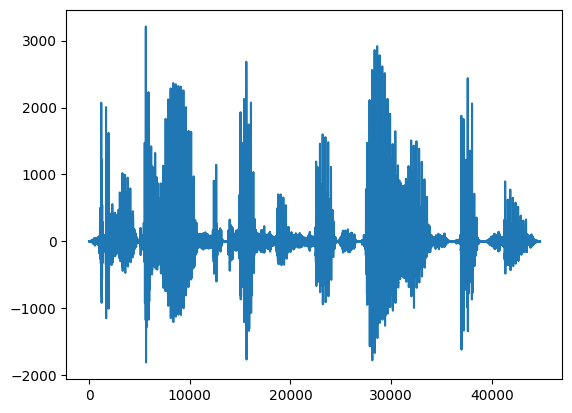

In [4]:
start = int(aks_example1[2]['StTime'] * TARGET_SAMPLE_RATE)
end = int(aks_example1[2]['EnTime'] * TARGET_SAMPLE_RATE)
text, audio, speaker = data[aks_example1[0]] # type: ignore
sample = (aks_example1[2]['Content'], audio[start:end], speaker) # type: ignore
show_sample(sample)

In [5]:
MODEL_ID = "facebook/wav2vec2-lv-60-espeak-cv-ft"
DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
torch.mps.empty_cache()
processor = AutoProcessor.from_pretrained(MODEL_ID)
model = AutoModelForCTC.from_pretrained(MODEL_ID).to(DEVICE)

In [6]:
transcribe_batch([sample], model, processor)

['æ d ɪ z ɡ æ n d æ k s ð ə k w ɛ ʃ ə n z t ə ɛ k s p l ɔːɹ j oʊ s p ɛ k t ə m']